In [1]:
from psycopg2 import connect
from modules.Tv_assinatura import Tv_assinatura
from modules.conector_postgree import Interface_db_postgree
from modules.conector_cassandra import Interface_db_cassandra
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import psycopg2
from psycopg2.extras import execute_values
from cassandra.query import BatchStatement
from cassandra.cluster import Cluster, ProfileManager
import matplotlib.pyplot as plt

In [2]:
def chunk(dataframe, size):
    
    for i in range(0, len(dataframe), size): 
        yield dataframe[i:i + size]

In [12]:
lendo = Tv_assinatura(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\tv_assinatura\Acessos_TV_Assinatura.csv")
lendo.tratamento_geral()
df_tv_assinatura = lendo.get_resultado()
print('tratado')
print(df_tv_assinatura)

tratado
          Ano  Mês Grupo Econômico   Empresa            CNPJ  \
0        2021   11              OI        OI   5423963000111   
1        2021   11              OI        OI   5423963000111   
2        2021   11              OI        OI   5423963000111   
3        2021   11              OI        OI   5423963000111   
4        2021   11              OI        OI   5423963000111   
...       ...  ...             ...       ...             ...   
2490674  2012    1        SKY/AT&T  SKY/AT&T  72820822000120   
2490675  2012    1        SKY/AT&T  SKY/AT&T  72820822000120   
2490676  2012    1        SKY/AT&T  SKY/AT&T  72820822000120   
2490677  2012    1        SKY/AT&T  SKY/AT&T  72820822000120   
2490678  2012    1        SKY/AT&T  SKY/AT&T  72820822000120   

        Porte da Prestadora  UF              Município  Código IBGE Município  \
0              Grande Porte  MS              Vicentina                5008404   
1              Grande Porte  CE               Ararendá       

In [13]:
chunked_tv_assinatura = chunk(df_tv_assinatura, 50000)

In [14]:
con = psycopg2.connect(user='postgres', password='Eugostode@55', host='localhost', database='telecomunicacao')
cursor = con.cursor()
print('conexao')

conexao


In [15]:
for df in chunked_tv_assinatura:
    try:
        data = np.array(df)
        list_postgre = []
        for item in data:
            value = tuple(item)
            list_postgre.append(value)  
        # list_postgre = str(list_postgre)[1:-1]
        sql = f"INSERT INTO tv_assinatura (ano ,mes ,grupo_economico ,Empresa ,CNPJ,porte_prestadora ,uf ,municipio ,codigo_ibge_municipio ,Tecnologia ,Meio_acesso ,tipo_pessoa ,acessos) values %s;"
        execute_values(cursor, sql, list_postgre)
        con.commit()
        print('inerindo')
    except Exception as e:
        print("Erro ao inserir dados ", str(e))

inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo


In [16]:
conect_post = Interface_db_postgree('postgres','Eugostode@55', 'localhost', 'telecomunicacao')

In [18]:
dados_tv_assinatura = conect_post.select(query="select t1.*,  t2.uf, t2.municipio, t2.codigo_ibge_municipio,  t3.tipo_pessoa, t3.acessos from empresatvassinatura t1 inner join localidadetvassinatura t2  on t2.id_tv_assinatura = t1.id_tv_assinatura  inner join tipopessoatvassinatura t3 on t3.id_tv_assinatura = t2.id_tv_assinatura order by t1.id_tv_assinatura;") 
df_tv_assinatura = pd.DataFrame(dados_tv_assinatura)
a = df_tv_assinatura.info()
# a[6] = a[6].astype(str, errors = 'raise')
print(a)
print(df_tv_assinatura)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490679 entries, 0 to 2490678
Data columns (total 14 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       int64 
 1   1       object
 2   2       int64 
 3   3       int64 
 4   4       object
 5   5       int64 
 6   6       object
 7   7       object
 8   8       object
 9   9       object
 10  10      object
 11  11      int64 
 12  12      object
 13  13      int64 
dtypes: int64(6), object(8)
memory usage: 266.0+ MB
None
              0         1     2   3         4               5             6   \
0              1        OI  2021  11        OI   5423963000111  Grande Porte   
1              2        OI  2021  11        OI   5423963000111  Grande Porte   
2              3        OI  2021  11        OI   5423963000111  Grande Porte   
3              4        OI  2021  11        OI   5423963000111  Grande Porte   
4              5        OI  2021  11        OI   5423963000111  Grande Porte   
...          ...       ...   .

In [29]:
query = """
    INSERT INTO tv_assinatura (
        id_tv_assinatura ,
        Empresa,
        ano,
        mes,
        grupo_economico,
        CNPJ ,
        porte_prestadora,
        Tecnologia,
        Meio_acesso,
        uf,
        municipio,
        codigo_ibge_municipio,
        tipo_pessoa,
        acessos    
    ) values (
        ?,?,?,?,?,?,?,?,?,?,?,?,?,?
    )
"""

In [30]:
conect_cassa = Interface_db_cassandra('telecomunicacoes') 

In [31]:
insert = conect_cassa.connector().prepare(query)
chunked_df = chunk(df_tv_assinatura, 100)
for df in chunked_df:
    batch = BatchStatement()
    for _, row in df.iterrows():
        batch.add(insert, tuple(row))
    print(">> executando batch")
    conect_cassa.inserir(batch)
print(">> dados inseridos")
    
print("inseriu tudo")

>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch


In [2]:
conect_cassa = Cluster()
session = conect_cassa.connect("telecomunicacoes")

In [3]:
query = "SELECT * FROM tv_assinatura;"
a = session.execute(query) 

In [4]:
lista = []
for i in a:
    lista.append(i)
b = pd.DataFrame(lista)   
print(b)

         id_tv_assinatura  acessos   ano            cnpj  \
0                 1792034      118  2015  72820822000120   
1                  302602        4  2021   5423963000111   
2                 2301876       41  2012   9132659000176   
3                  531141        2  2020   4425426000148   
4                 2119753       48  2013   4425426000148   
...                   ...      ...   ...             ...   
2490674            783760        5  2019   4425426000148   
2490675           1180941      413  2017   5423963000111   
2490676           1220022       19  2017    497373000110   
2490677           2403942        2  2012   4425426000148   
2490678           1376241      111  2016   5423963000111   

         codigo_ibge_municipio   empresa   grupo_economico meio_acesso  mes  \
0                      2406106  SKY/AT&T          SKY/AT&T    Satélite    3   
1                      5106455        OI                OI    Satélite    2   
2                      5003504     CLARO  

In [7]:
b.sort_values(by=['id_tv_assinatura'], ascending=False, inplace=True)
# Cabo_Metalico = b.loc[b["meio_acesso"] == 'Cabo Metálico']
# Cabo_Coaxial = b.loc[b["meio_acesso"] == 'Cabo Coaxial']
# indeterminado = b.loc[b['meio_acesso'] == 'Indeterminado']
# Fibra = b.loc[b["meio_acesso"] == 'Fibra']
# Radio = b.loc[b["meio_acesso"] == 'Rádio'] 
# Satélite = b.loc[b["meio_acesso"]== 'Satélite']


dataframe_Cabo_Metalico = b.groupby("ano").sum()
dataframe_Cabo_Metalico.reset_index(inplace = True)
# dataframe_Cabo_Coaxial = Cabo_Coaxial.groupby("ano").sum()
# dataframe_Cabo_Coaxial.reset_index(inplace = True)
# dataframe_indeterminado = indeterminado.groupby("ano").sum()
# dataframe_indeterminado.reset_index(inplace = True)
# dataframe_Fibra = Fibra.groupby("ano").sum()
# dataframe_Fibra.reset_index(inplace = True)
# dataframe_Radio = Radio.groupby("ano").sum()
# dataframe_Radio.reset_index(inplace = True)
# dataframe_Satélite = Satélite.groupby("ano").sum()
# dataframe_Satélite.reset_index(inplace = True)

In [11]:
lico = dataframe_Cabo_Metalico.loc[dataframe_Cabo_Metalico["ano"] == 2021]
lico.head()

,ano,id_tv_assinatura,acessos,cnpj,codigo_ibge_municipio,mes
9,2021,63817889691,168134787,2316734000976027648,1189940833287,2154504


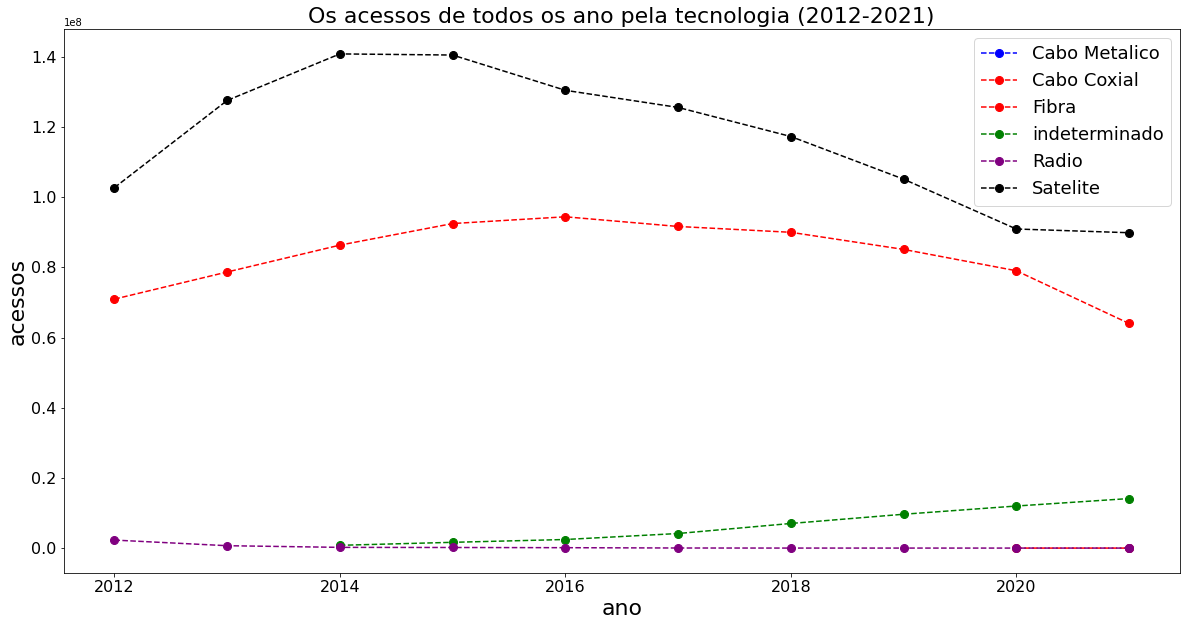

In [9]:
plt.figure(figsize=(20,10))
plt.plot(dataframe_Cabo_Metalico["ano"], dataframe_Cabo_Metalico["acessos"], linestyle='--', marker='o', color = 'blue', markersize = 8)
plt.plot(dataframe_Cabo_Coaxial["ano"], dataframe_Cabo_Coaxial["acessos"], linestyle='--', marker='o', color = 'red', markersize = 8)
plt.plot(dataframe_indeterminado["ano"], dataframe_indeterminado["acessos"], linestyle='--', marker='o', color = 'red', markersize = 8)
plt.plot(dataframe_Fibra["ano"], dataframe_Fibra["acessos"], linestyle='--', marker='o', color = 'green', markersize = 8)
plt.plot(dataframe_Radio["ano"], dataframe_Radio["acessos"], linestyle='--', marker='o', color = 'purple', markersize = 8)
plt.plot(dataframe_Satélite["ano"], dataframe_Satélite["acessos"], linestyle='--', marker='o', color = 'black', markersize = 8)
plt.title("Os acessos de todos os ano pela tecnologia (2012-2021)", fontsize=22)
plt.xlabel("ano", fontsize=22)
plt.ylabel("acessos", fontsize=22)
plt.legend(['Cabo Metalico', 'Cabo Coxial' ,'Fibra', 'indeterminado', 'Radio', 'Satelite'], fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()

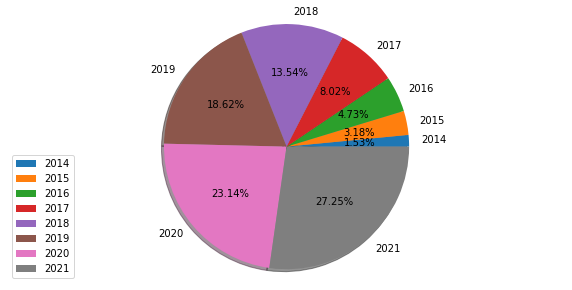

In [20]:
plt.figure(figsize=(10,5))
plt.pie(dataframe_Fibra['acessos'], labels=dataframe_Fibra['ano'], autopct='%2.2f%%', shadow=True)
plt.legend(dataframe_Fibra['ano'], loc=3)
plt.axis('equal')
plt.show()